## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/miguelgunawan/dataset-w2-Data-Mining/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#3 check missing values
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


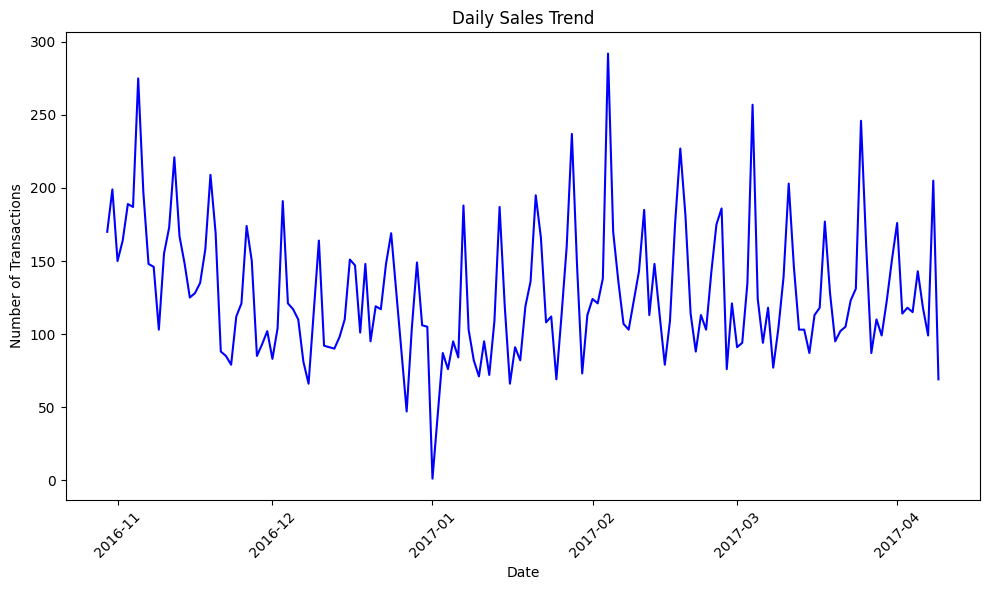

In [25]:
# 5
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df['date'] = df['date_time'].dt.date

daily_transactions = df.groupby('date').size()

plt.figure(figsize=(10, 6))
plt.plot(daily_transactions.index, daily_transactions.values, linestyle='-', color='b')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [6]:
# 6
df['date_time'] = pd.to_datetime(df['date_time'])

sampled_df = df.sample(5)

sampled_df['day'] = sampled_df['date_time'].dt.day
sampled_df['month'] = sampled_df['date_time'].dt.month
sampled_df['year'] = sampled_df['date_time'].dt.year
sampled_df['time'] = sampled_df['date_time'].dt.strftime('%H:%M:%S')
sampled_df['hour'] = sampled_df['date_time'].dt.hour
sampled_df['day_name'] = sampled_df['date_time'].dt.day_name()

ordered_columns = [
    "Transaction", "Item", "date_time", "period_day", "weekday_weekend",
    "day", "month", "year", "time", "hour", "day_name"
]
sampled_df = sampled_df[ordered_columns]

sampled_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
878,441,Coffee,2016-11-04 08:45:00,morning,weekday,4,11,2016,08:45:00,8,Friday
4821,2374,Coffee,2016-12-01 10:46:00,morning,weekday,1,12,2016,10:46:00,10,Thursday
11777,5840,Coffee,2017-02-03 10:58:00,morning,weekday,3,2,2017,10:58:00,10,Friday
17141,8140,Chicken Stew,2017-03-14 13:51:00,afternoon,weekday,14,3,2017,13:51:00,13,Tuesday
14684,7070,Jammie Dodgers,2017-02-23 15:57:00,afternoon,weekday,23,2,2017,15:57:00,15,Thursday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


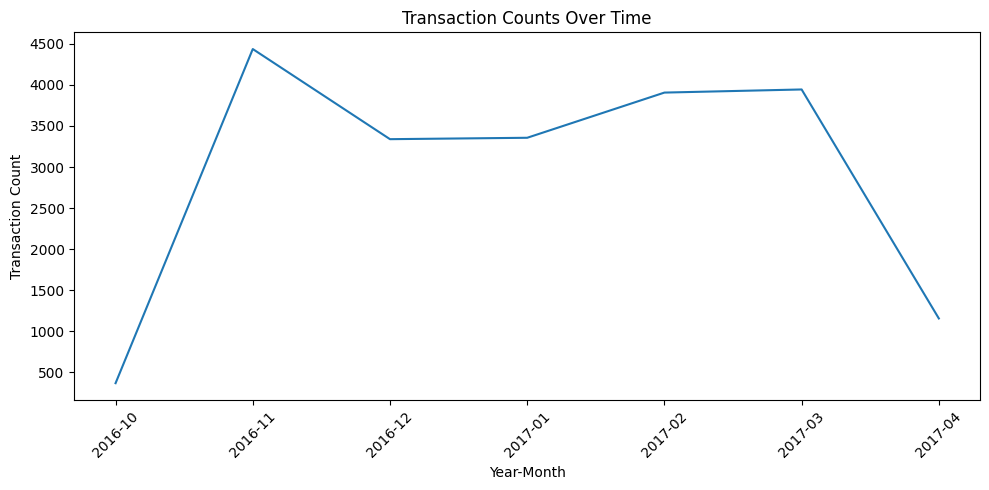

In [7]:
# 7
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

df['Year-Month'] = df['date_time'].dt.to_period('M').astype(str)

monthly_data = df.groupby('Year-Month').size().reset_index(name='Transaction Count')

plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Year-Month'], monthly_data['Transaction Count'])
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

Dari visualisasi ini, kita dapat melihat trendline bagaimana trend penjualan dari perhitungan jumlah transaksi mulai yang terbanyak hingga paling sedikit selama periode waktu yang ditentukan ( bulan 10 tahun 2016 hingga bulan 4 tahun 2017). Kita dapat melihat transaksi terbanyak terjadi pada bulan 11 tahun 2016 dan transaksi paling sedikit terjadi pada bulan 10 tahun 2026

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [8]:
#9

weekday_names = df[df['weekday_weekend'] == 'weekday']['date_time'].dt.day_name().unique()
weekend_names = df[df['weekday_weekend'] == 'weekend']['date_time'].dt.day_name().unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [9]:
#10
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

transaction_agg = df.pivot_table(index='month', columns='day_name', values='Transaction', aggfunc='count', fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_agg = transaction_agg[days_order]

transaction_agg


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

- Weekend (Sabtu dan Minggu) secara konsisten menunjukkan jumlah transaksi yang lebih tinggi dibandingkan hari kerja (Senin hingga Jumat). Hal ini menunjukkan bahwa pelanggan lebih aktif berbelanja pada weekend.

- Bulan dengan transaksi tinggi terlihat pada bulan-bulan tertentu seperti Januari, Februari, Maret, November, dan Desember, dengan puncak transaksi pada akhir pekan, terutama Sabtu.

- Bulan April memiliki penurunan transaksi yang signifikan dibandingkan bulan-bulan lainnya, baik di hari kerja maupun akhir pekan.

- Bulan Oktober menunjukkan data yang kurang lengkap, namun tetap ada sedikit transaksi di hari Senin dan Minggu.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


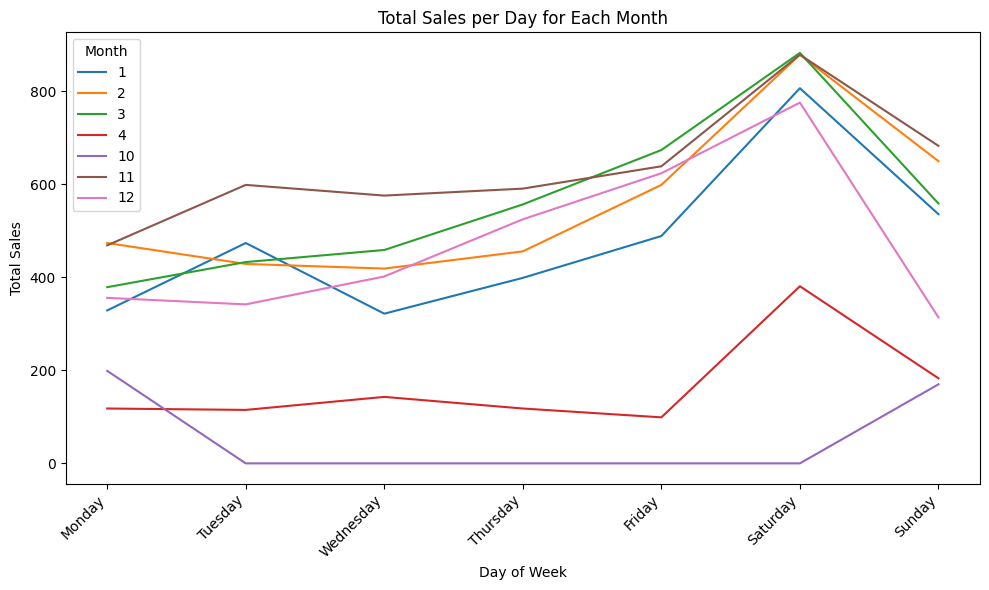

In [10]:
# 12
# Create the transaction table
transaction_table = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]
transaction_table = transaction_table.astype(int)

# Transpose the table for the desired plot
transaction_table = transaction_table.T
# Create the line chart
transaction_table.plot(kind='line', figsize=(10, 6))
plt.title('Total Sales per Day for Each Month')
plt.xlabel('Day of Week')  # Changed x-axis label
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Month')  # Changed legend title
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

Dari trendline visualisasi di atas, kita dapat melihat bahwa trend penjualan dari senin selasa rabu dan kamis ada yang menurun dan beberapa meningkat, namun pada weekday sabtu minggu terutama hari sabtu penjualan selalu mengalami peningkatan paling tinggi.

Penjualan di bulan 4 dan 10 cenderung lebih sedikit dan sisanya lebih tinggi.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [11]:
# 14
unique_period_day = df['period_day'].unique()
print(unique_period_day)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [12]:
# 15
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

df['hour'] = df['date_time'].dt.hour

morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

print("Unique morning_hour:", morning_hours)
print("Unique afternoon_hour:", afternoon_hours)
print("Unique evening_hour:", evening_hours)
print("Unique night_hour:", night_hours)

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?


Ya, ada sesuatu yang aneh dalam hasil tersebut. Jika kita perhatikan, jam "1" muncul dalam daftar jam untuk "morning" (pagi), padahal jam 1 biasanya dianggap sebagai bagian dari "night" (malam) atau "early morning" (dini hari), bukan pagi.

Menurut saya jam 1 adalah dini hari, dikarenakan pada morning hour tidak terdapat jam 2,3,4,5,6 selain karena tidak terdapat di dalam dataset. Sehingga lebih tepat. jam 1 dimasukkan ke dalam variabel night hour.

Urutan waktu juga tidak urut sebaiknya diurutkan, seperti pada night hour seharusnya [21,22,23] dan morning hour [7,8,9,10,11]


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


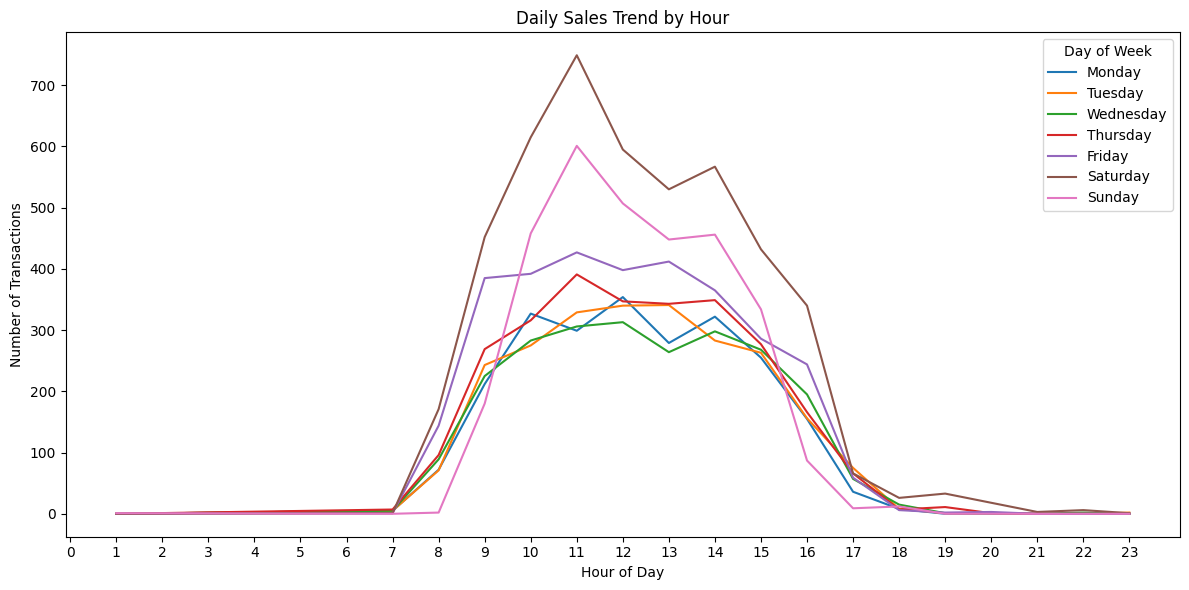

In [13]:
# 17
#Group by day and hour, then count transactions
daily_hourly_sales = df.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()

# Pivot the table for plotting
daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)

# Ensure days are in the desired order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]

# Create the line chart
daily_hourly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.legend(title='Day of Week')
plt.tight_layout()

plt.show()

18. The daily sales trend plot reveals that _______

Pada visualisasi trend harian, dapat dilihat bahwa setiap harinya dari jam 1 - 23 penjualan terbanyak selalu terjadi dalam rentan jam 7 - 17. Penjualan terbanyak juga terjadi pada hari sabtu kemudian diikuti hari minggu yang keduanya adalah weekend

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


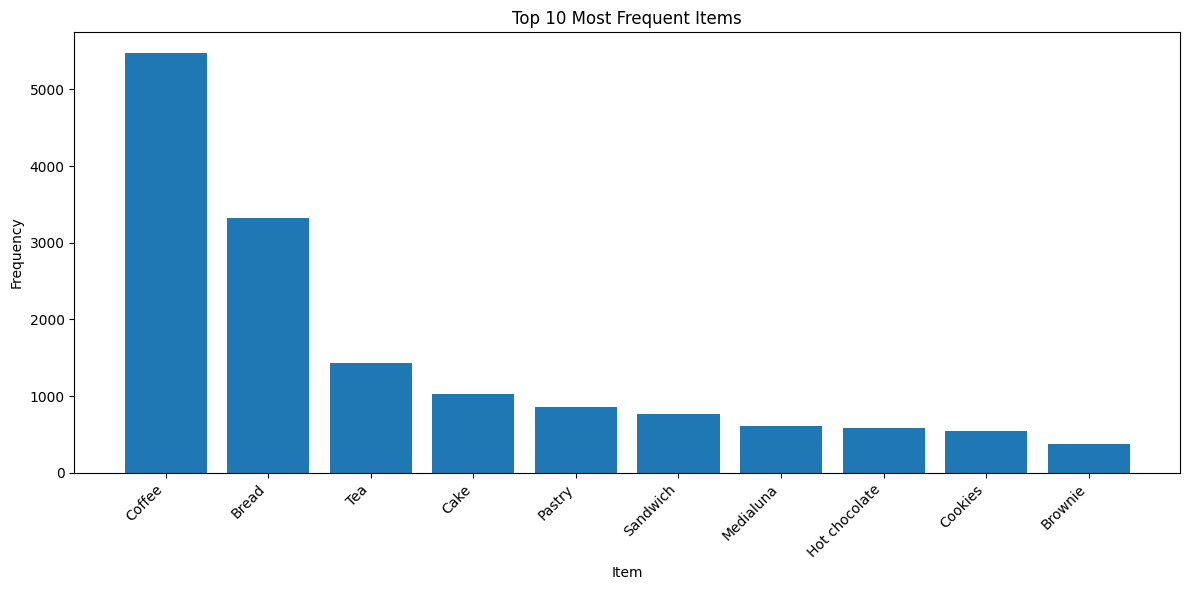

In [21]:
# 19
# Group by item and count occurrences
item_frequency = df.groupby('Item')['Transaction'].count().reset_index()

# Rename the 'Transaction' column to 'Frequency'
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})

# Sort by frequency in descending order
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 items
plt.figure(figsize=(12, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-d3fc189486be>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


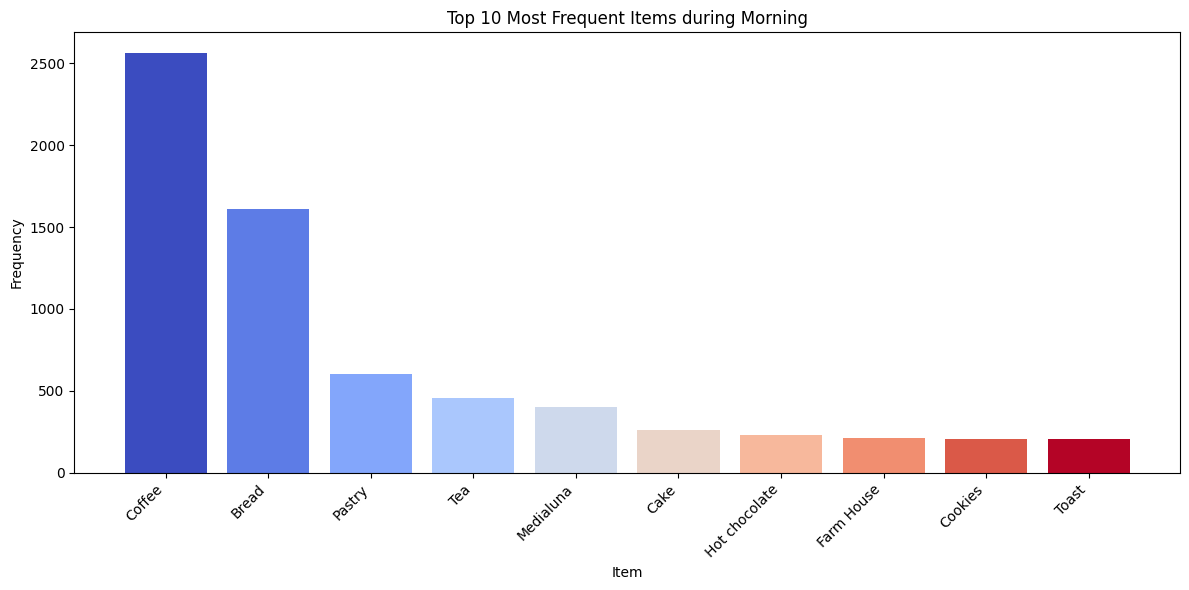

<ipython-input-22-d3fc189486be>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


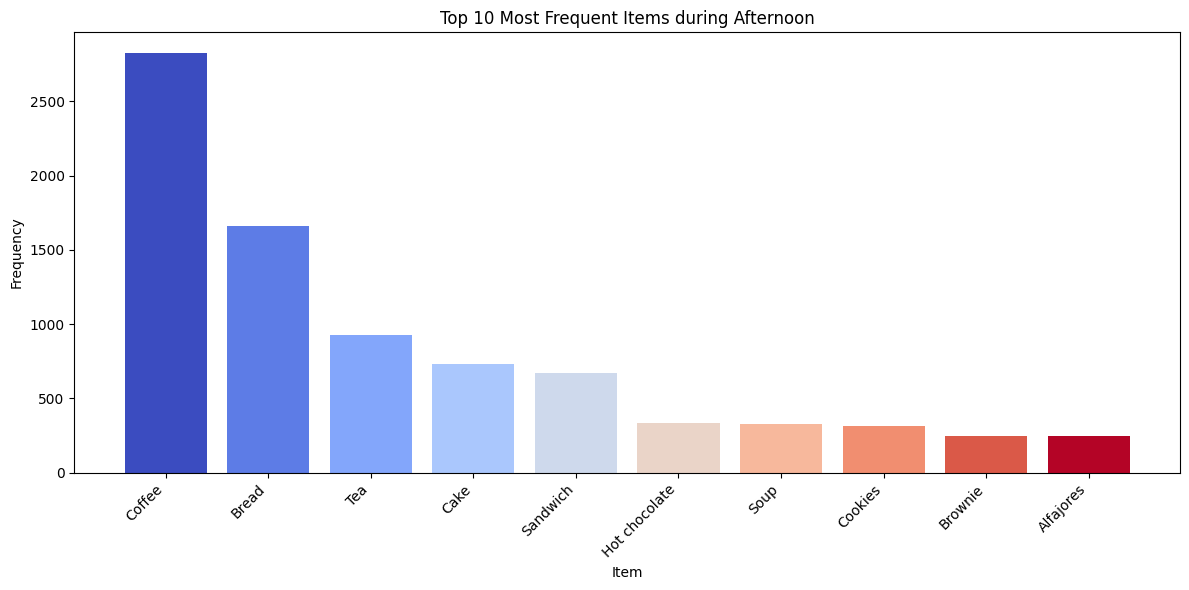

<ipython-input-22-d3fc189486be>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


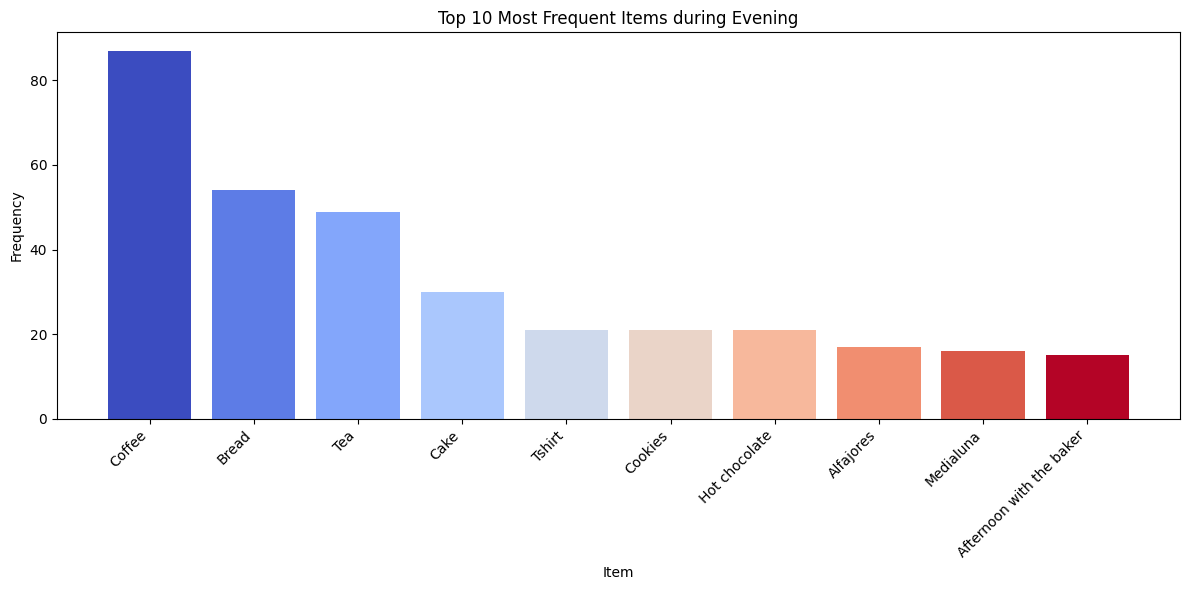

<ipython-input-22-d3fc189486be>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


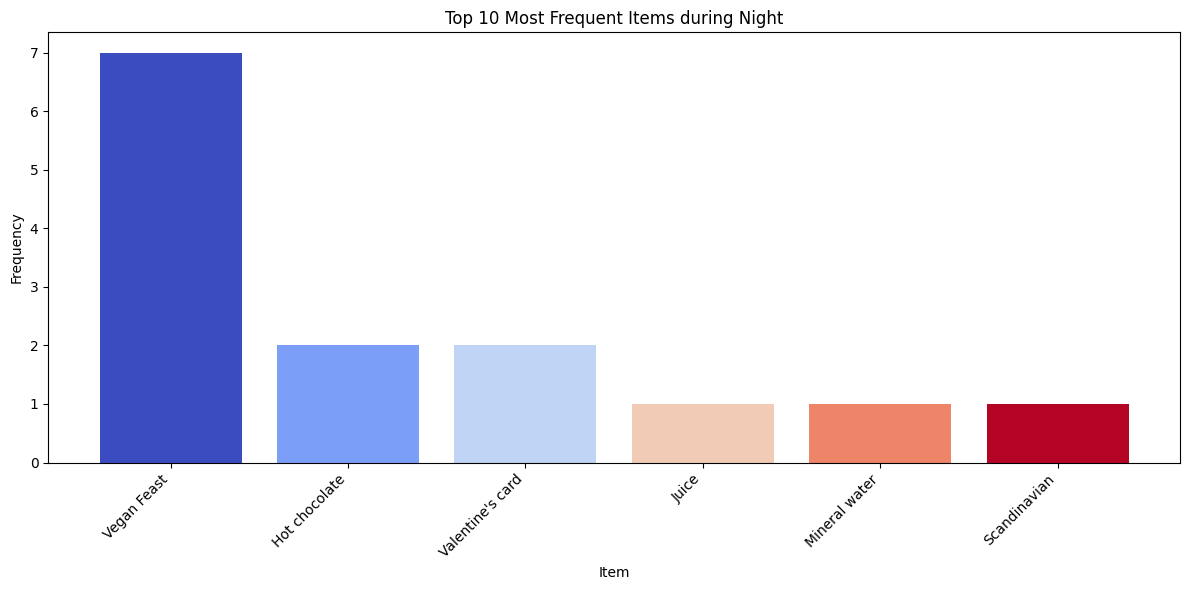

In [22]:
# 20
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    # Filter data for the specified period
    period_data = df[df['period_day'] == period]

    # Group by item and count occurrences for the period
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

    # Create a bar plot for the top 10 items in the period
    plt.figure(figsize=(12, 6)) # Fixed indentation here
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Items during {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for each period
for period in df['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is ____


Pada pagi, sing, dan sore item yang sering dibeli orang rata-rata mirip hanya jumlah pembelian yang berbeda, tetapi paling sering dibeli adalah coffee dan diikuti bread, sedangkan pada malam hari kopi tidak ada dan penjualan tertinggi adalah vegan feast dan diikuti hot chocolate.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


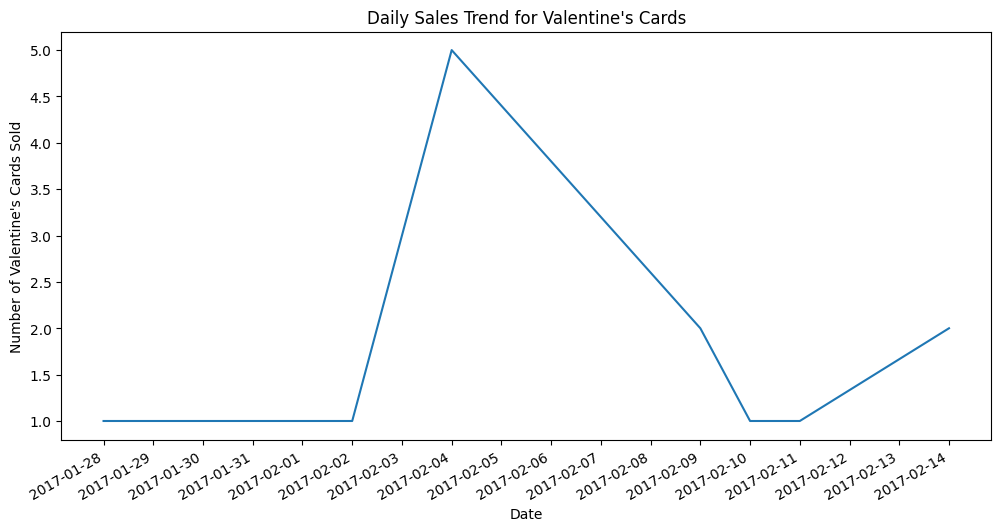

In [26]:
#22
# Assuming 'df' is your DataFrame as defined in the previous code.

# Filter transactions containing "Valentine's card"
valentines_card_transactions = df[df['Item'] == "Valentine's card"]

# Group by date and count transactions
valentines_sales_by_date = valentines_card_transactions.groupby('date')['Transaction'].count()


# Plot daily transaction trends for Valentine's card
plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Valentine\'s Cards Sold')
plt.title('Daily Sales Trend for Valentine\'s Cards')
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


Valentine's card ,mengalami peningkaatan penjualan mulai tanggal 3 bulan 2 2017 hingga tanggal 9 bulan 2 2017, tetapi terjual paling banyak terjadi pada tanggal 4 bulan 2 tahun 2017

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [27]:
# 24
# Group data by 'Transaction' and 'Item' and sum quantities
df['Quantity'] = df.groupby(['Transaction', 'Item'])['Item'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
df = df.drop_duplicates(subset=['Transaction', 'Item'])

# Create a pivot table to represent transactions
transaction_data = df.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#25
# Create a basket of items for each transaction
basket = (df.groupby(['Transaction', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

# Convert quantitiess to 1 or 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Drop 'NONE' column if present
if 'NONE' in basket_sets.columns:
  basket_sets = basket_sets.drop('NONE', axis=1)

# Display the transformed dataset
basket_sets.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-fc0ba52c9530>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [35]:
# 26
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

transaction_data = transaction_data.astype(bool)

frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Buat DataFrame dengan kolom 'support' dan 'itemsets'
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [34]:
# 27
#Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



- Tren Transaksi:
Data menunjukkan bahwa toko roti mencapai puncak penjualan pada akhir pekan (Sabtu dan Minggu), karena banyak orang memiliki waktu luang dan menikmati makanan seperti roti di akhir pekan.

- Toko roti juga paling ramai antara pukul 10 pagi hingga 12 siang, menunjukkan bahwa banyak orang datang untuk camilan menjelang siang atau membeli roti untuk makan siang mereka.
- Penjualan cenderung meningkat menjelang akhir tahun, mungkin karena musim liburan dan perayaan.

- Popularitas Produk:
Produk yang paling banyak dibeli adalah Kopi, Roti, dan Teh. Ini menunjukkan bahwa produk-produk ini adalah andalan di toko roti dan disukai banyak pelanggan.
Kopi, Roti, Teh, dan Pastry banyak dibeli sepanjang hari, dari pagi hingga malam, menunjukkan bahwa pelanggan selalu menginginkan produk ini kapan pun.
Namun, di sore hari, penjualan Kue Kering, Cokelat Panas, dan Kue meningkat, menunjukkan bahwa pelanggan suka menikmati camilan sore hari.
Penjualan kartu Valentine memuncak pada bulan Februari, terutama sekitar Hari Valentine, sesuai dengan sifat produk tersebut.

- Algoritma Apriori menunjukkan bahwa beberapa produk sering dibeli bersama. Misalnya, Kopi dan Roti Panggang sering dibeli bersamaan, yang menunjukkan bahwa orang suka memadukan keduanya.
Kombinasi lainnya termasuk Kopi dengan Medialuna, Pastry, dan Kue, yang bisa dimanfaatkan untuk membuat penawaran atau promosi bundling produk.

- Kombinasi produk yang lebih spesifik, seperti Cokelat Panas dengan Kopi atau Medialuna dengan Kopi, menunjukkan adanya peluang untuk menyasar selera pelanggan tertentu. Temuan ini dapat membantu strategi penjualan, misalnya dengan menawarkan paket bundling Kopi dan Pastry atau Kue, meningkatkan penjualan Sandwich dengan Kopi, dan membuat promosi berdasarkan kombinasi produk yang sering dibeli bersama, seperti Kopi dan Roti Panggang sehingga semakin menarik minat para pembeli.

- Item seperti Medialuna, meskipun jarang dibeli, tetap memiliki peluang karena bisa menarik minat segmen pelanggan tertentu. Secara keseluruhan, informasi ini bisa digunakan untuk membuat strategi pemasaran dan promosi yang lebih tepat sasaran agar penjualan dapat terusmeningkat.

-----------------------------------------------
Rekomendasi:
Berdasarkan data ini, berikut beberapa rekomendasi untuk toko roti:

- Penataan Staf dan Inventaris: Sesuaikan jumlah staf dan stok barang untuk mengatasi lonjakan pembelian pada jam-jam ramai (10 pagi hingga 12 siang) dan akhir pekan.

- Strategi Promosi: Cobalah menawarkan paket bundel atau diskon untuk produk yang sering dibeli bersama, seperti Kopi dan Roti Panggang, agar pelanggan lebih tertarik membeli keduanya.

- Fokus Produk: Pastikan produk utama seperti Kopi, Roti, Teh, dan Pastry selalu tersedia karena mereka adalah produk yang paling banyak dibeli.

- Musim dan Acara Spesial: Manfaatkan momen spesial seperti Hari Valentine dengan promosi khusus atau produk bertema untuk meningkatkan penjualan.

- Camilan Sore: Promosikan produk seperti Kue Kering, Cokelat Panas, dan Kue di sore hari karena banyak pelanggan mencari camilan pada waktu ini.